In [3]:
%%timeit

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

1.43 µs ± 28.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [2]:
df = pd.read_csv('LoanData.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# DATA UNDERSTANDING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**COLUMN NAME UNDERSTANDING**

Loan_ID --> unique loan ID

Gender--> gender of the applicant

Married--> marriage status

Dependents-->no. of dependents of the applicant

Education-->education of applicant

Self_Employed-->whether self employed or not

ApplicantIncome-->income of applicant

CoapplicantIncome-->income of the coapplicant

LoanAmount-->loan amount in thousands

Loan_Amount_Term-->loan term in months

Credit_History-->whether the credit history is good or bad/credit history meets guidelines

Property_Area-->house belongs to urban/rural/semi urban

Loan_Status-->loan approved or rejected/target variable


In [5]:
df.Loan_ID.nunique()

614

In [6]:
df.drop(columns='Loan_ID',inplace=True)

In [7]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [15]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [18]:
df['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [19]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [20]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [23]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [24]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [25]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [26]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [27]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [28]:
continous = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

discrete_categorical= ['Gender','Married','Education','Self_Employed',
                       'Credit_History','Property_Area','Loan_Status']

discrete_count = ['Dependents','Loan_Amount_Term']

# EXPLORATORY DATA ANALYSIS

FOR CONTINOUS

In [29]:
df[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


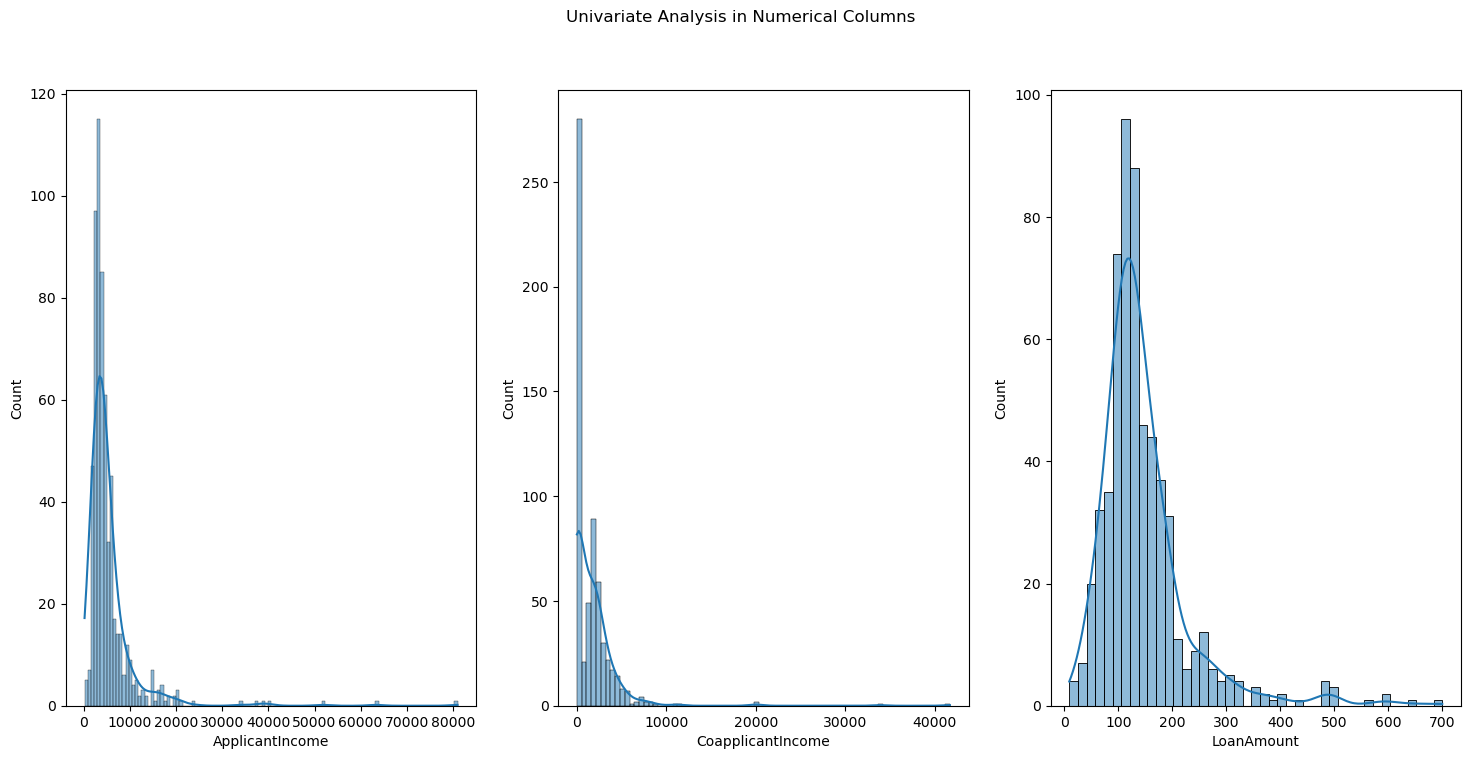

In [30]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
sns.histplot(df.ApplicantIncome,kde=True)

plt.subplot(1,3,2)
sns.histplot(df.CoapplicantIncome,kde=True)

plt.subplot(1,3,3)
sns.histplot(df.LoanAmount,kde=True)

plt.suptitle('Univariate Analysis in Numerical Columns')
plt.show()

In [31]:
df[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

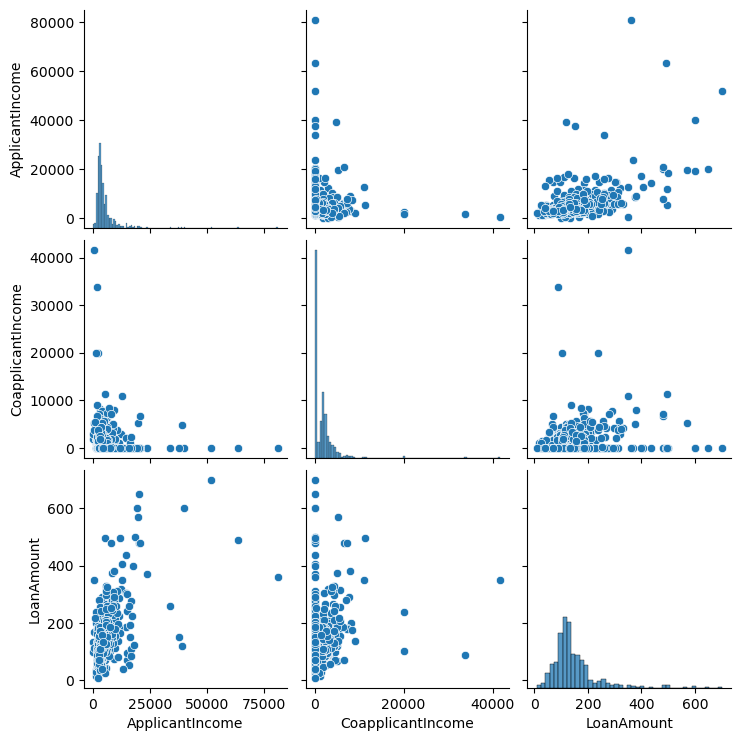

In [32]:
sns.pairplot(df[continous])
plt.show()

In [33]:
df[continous].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.570909
CoapplicantIncome,-0.116605,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


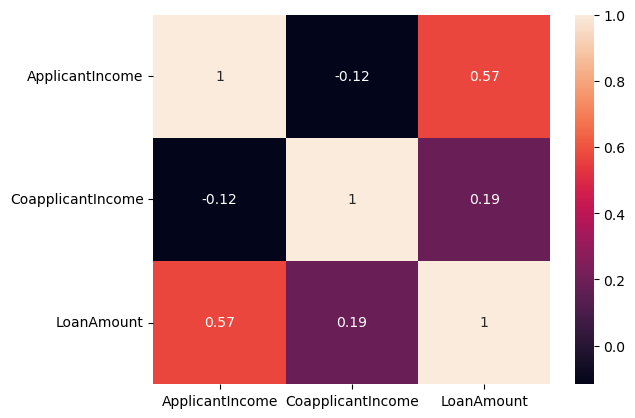

In [34]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

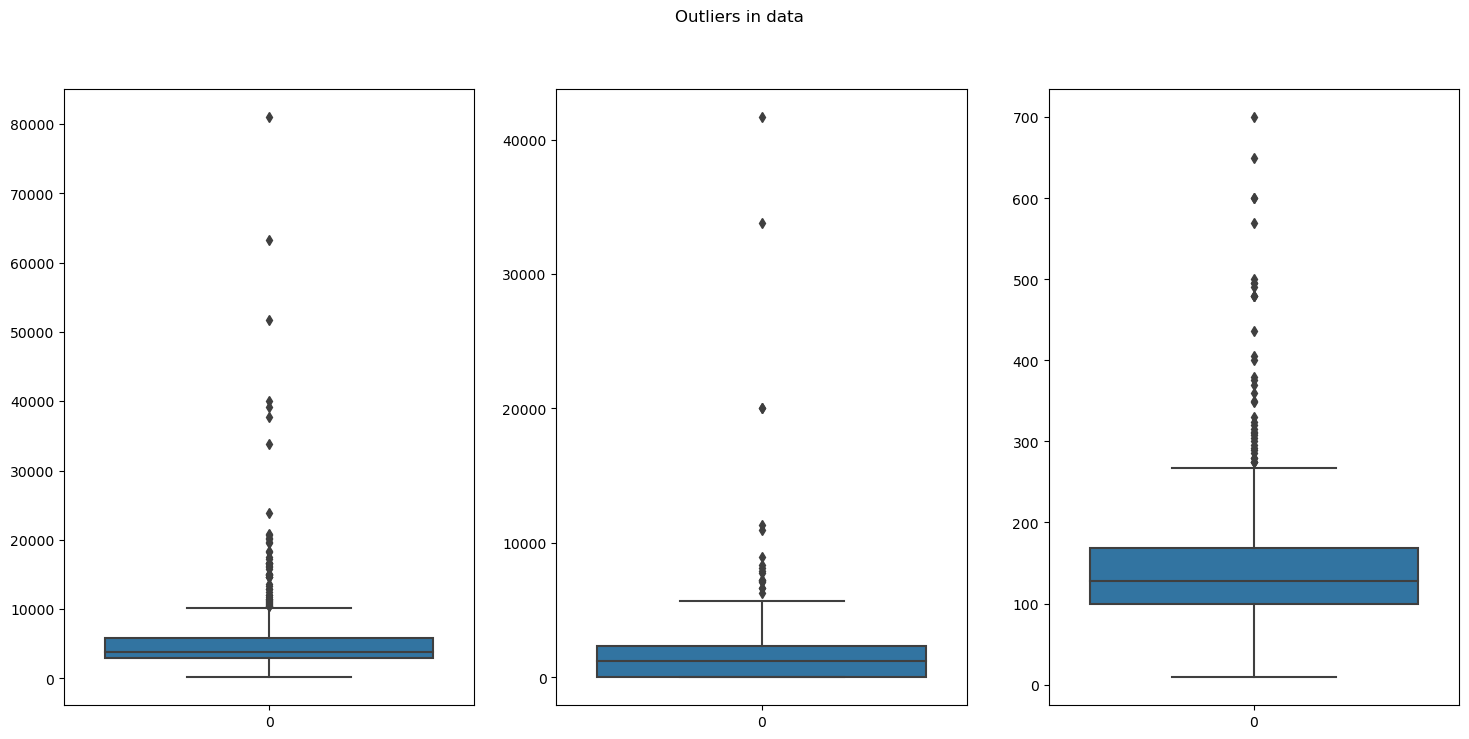

In [35]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outliers in data')
plt.show()

FOR DISCRETE

In [36]:
discrete_categorical

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [37]:
df[discrete_categorical].describe(include = "all")

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564.000000,614,614
unique,2,2,2,2,NaN,3,2
top,Male,Yes,Graduate,No,NaN,Semiurban,Y
freq,489,398,480,500,NaN,233,422
mean,NaN,NaN,NaN,NaN,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [38]:
df.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


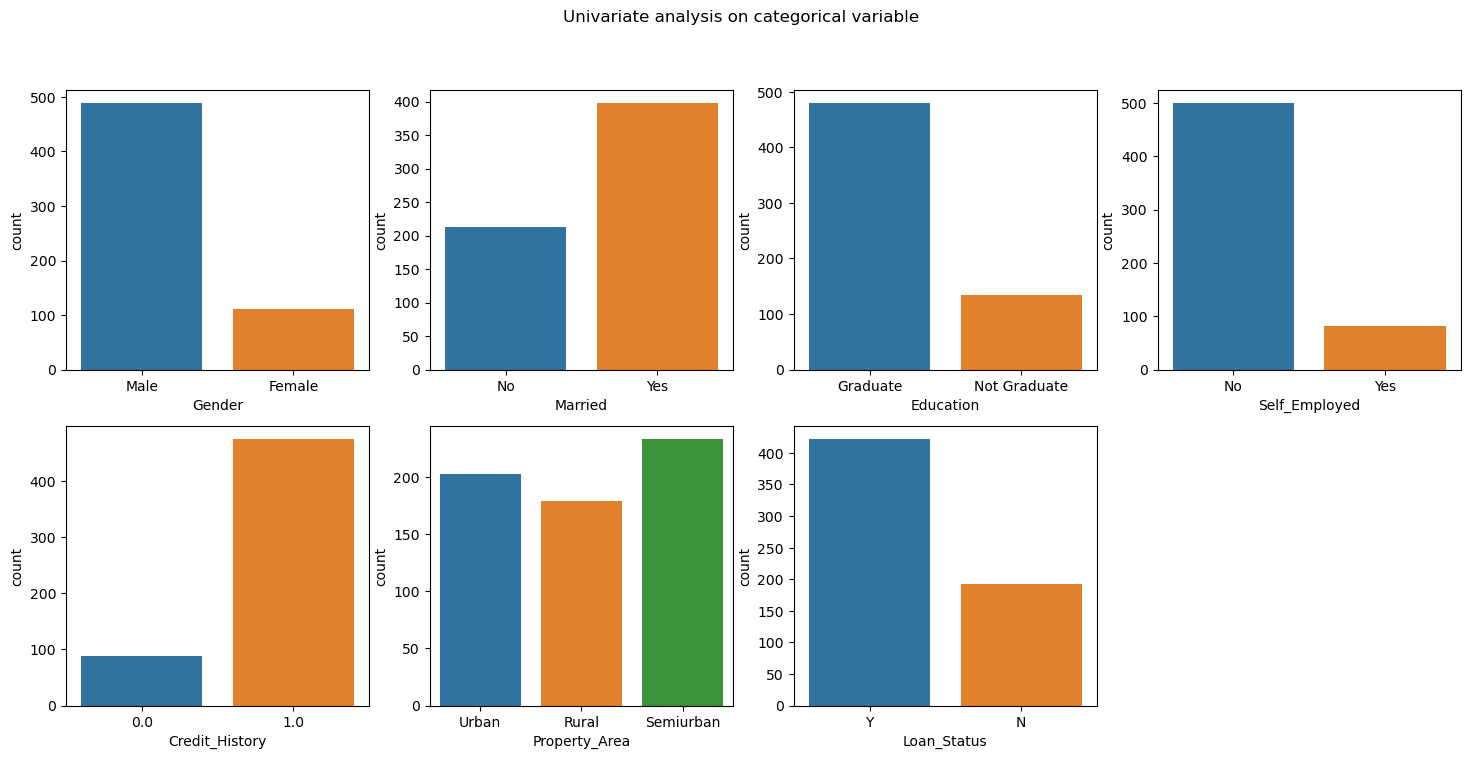

In [40]:
plt.figure(figsize=(18,8))

plt.subplot(2,4,1)
sns.countplot(x=df['Gender'])

plt.subplot(2,4,2)
sns.countplot(x=df['Married'])

plt.subplot(2,4,3)
sns.countplot(x=df['Education'])

plt.subplot(2,4,4)
sns.countplot(x=df['Self_Employed'])

plt.subplot(2,4,5)
sns.countplot(x=df['Credit_History'])

plt.subplot(2,4,6)
sns.countplot(x=df['Property_Area'])

plt.subplot(2,4,7)
sns.countplot(x=df['Loan_Status'])

plt.suptitle('Univariate analysis on categorical variable')
plt.show()

# DATA PREPROCESSSING

DATA CLEANING

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [43]:
df['Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            601 non-null    object 
 1   Married           611 non-null    object 
 2   Dependents        599 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     582 non-null    object 
 5   LoanAmount        592 non-null    float64
 6   Loan_Amount_Term  600 non-null    float64
 7   Credit_History    564 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  Income            614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [46]:
df['Dependents'].replace('3+','3',inplace=True)

In [47]:
df.duplicated().sum()

0

In [48]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [49]:
df.isnull().sum()/len(df)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [50]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [51]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [52]:
df['Dependents'].fillna(0,inplace=True)

In [53]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

SINCE INCOME, LOAN-AMOUNT, LOANAMOUNT-TERM AND CREDIT SCORE OF THE APPLICANT PLAYS A MAJOR ROLE IN DETERMINING THE OUTPUT SO WE CAN'T REPLACE THE MISSING VALUES OF THIS COLUMN ON OUR OWN AND WILL DROP THEM

In [56]:
df.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'],inplace=True)

SINCE LOAN AMOUNT AND LOAN AMOUNT TERM ARE THE MAJOR FACTORS AFFECTING THE OUTPUT VARIABLE, WE WILL NOT REPLACE THE MISSING VALUES FOR THESE COLUMNS INSTEAD WE WILL DIRECTLY DROP THE MISSING VALUE'S ROWS

In [57]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 1 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            529 non-null    object 
 1   Married           529 non-null    object 
 2   Dependents        529 non-null    object 
 3   Education         529 non-null    object 
 4   Self_Employed     529 non-null    object 
 5   LoanAmount        529 non-null    float64
 6   Loan_Amount_Term  529 non-null    float64
 7   Credit_History    529 non-null    float64
 8   Property_Area     529 non-null    object 
 9   Loan_Status       529 non-null    object 
 10  Income            529 non-null    float64
dtypes: float64(4), object(7)
memory usage: 49.6+ KB


In [59]:
df['Dependents'] = df['Dependents'].astype('int')

In [64]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')

In [60]:
df['Credit_History'] = df['Credit_History'].astype(int)

In [ ]:
# we will retrain (work with outliers)

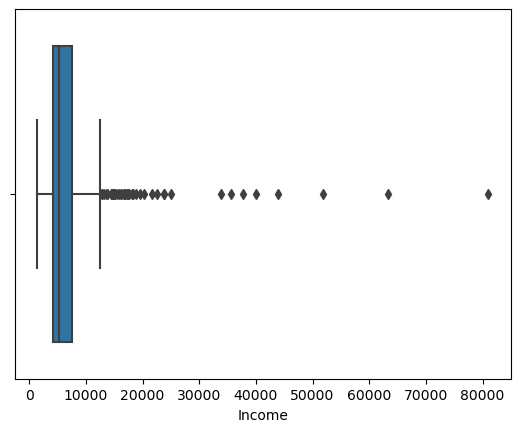

In [63]:
sns.boxplot(x=df['Income'])
plt.show()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 1 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            529 non-null    object 
 1   Married           529 non-null    object 
 2   Dependents        529 non-null    int32  
 3   Education         529 non-null    object 
 4   Self_Employed     529 non-null    object 
 5   LoanAmount        529 non-null    float64
 6   Loan_Amount_Term  529 non-null    int32  
 7   Credit_History    529 non-null    int32  
 8   Property_Area     529 non-null    object 
 9   Loan_Status       529 non-null    object 
 10  Income            529 non-null    float64
dtypes: float64(2), int32(3), object(6)
memory usage: 59.6+ KB


DATA WRANGLING

In [68]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}).astype('int')
df['Married'] = df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [69]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,128.0,360,1,0,0,6091.0
2,1,1,0,1,1,66.0,360,1,2,1,3000.0
3,1,1,0,0,0,120.0,360,1,2,1,4941.0
4,1,0,0,1,0,141.0,360,1,2,1,6000.0
5,1,1,2,1,1,267.0,360,1,2,1,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,71.0,360,1,0,1,2900.0
610,1,1,3,1,0,40.0,180,1,0,1,4106.0
611,1,1,1,1,0,253.0,360,1,2,1,8312.0
612,1,1,2,1,0,187.0,360,1,2,1,7583.0


In [70]:
#feature transformation
df['Income'].skew(),df['LoanAmount'].skew()

(5.777628425613762, 2.6079450669733437)

In [79]:
# boxcox
from scipy import stats
df['Income'],a = stats.boxcox(df['Income'])
df['LoanAmount'],b = stats.boxcox(df['LoanAmount'])

In [80]:
# we will do this in regression also??//=====================
#feature scaling
# since all features should be of same scale ,we will convert loan term from months to years
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12

In [64]:
#discretization

In [81]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,1,1,7.481930,30.0,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1,0,1,1.856069
610,1,1,3,1,0,4.460305,15.0,1,0,1,1.860675
611,1,1,1,1,0,7.388070,30.0,1,2,1,1.867771
612,1,1,2,1,0,6.870558,30.0,1,2,1,1.866991


In [133]:
X = df.drop(columns='Loan_Status')
y = df['Loan_Status']

# LOGISTIC REGRESSION

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=26)

In [84]:
#modelling
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

#prediction
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(lr,X_train,y_train,cv=5).mean()
print('cross_val:',cross_val)

acc_train: 0.8226950354609929
acc_test: 0.7830188679245284
cross_val: 0.8180112044817927


**BEST RANDOM STATE NUMBER**

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
acc_train=[]
acc_test=[]
cross_val=[]

for i in range(0,101):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    ypred_train = lr.predict(X_train)
    ypred_test = lr.predict(X_test)
    acc_train.append(accuracy_score(y_train,ypred_train))
    acc_test.append(accuracy_score(y_test,ypred_test))
    cross_val.append(cross_val_score(lr,X_train,y_train,cv=5).mean())

f = pd.DataFrame({'train':acc_train,'test':acc_test,'cv':cross_val})
a = f[(abs(f['train']-f['test'])<=0.05)&(abs(f['cv']-f['test'])<=0.05)]
rs = a[a['test']==a['test'].max()].index.to_list()[0]
rs

16

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=rs)

#modelling
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

#prediction
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(lr,X_train,y_train,cv=5).mean()
print('cross_val:',cross_val)

acc_train: 0.806146572104019
acc_test: 0.8490566037735849
cross_val: 0.8061064425770308


In [72]:
#confusion matrix

In [73]:
#classification report

In [74]:
#ROC

In [75]:
#AUC

# K-NN REGRESSION

In [78]:
# alag se scaling ni karege kyaaa???///
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()
param = {'n_neighbors':list(range(1,50))}

model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

knn_model = model.best_estimator_

#prediction
ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(knn_model,X_train,y_train,cv=5).mean()
print('cross_val:',cross_val)

acc_train: 0.75177304964539
acc_test: 0.8113207547169812
cross_val: 0.7304761904761905


In [ ]:
knn_model

In [81]:
#confusion matrix

In [82]:
#classification report

In [83]:
#ROC

In [84]:
#AUC

# SVM CLASSIFICATION

HYPERPARAMETER TUNING

In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
estimator = SVC()
param = {'C':[0.001,0.01,0.1,],'kernel':['linear','sbf','sigmoid','poly']}
model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

svm_model = model.best_estimator_

#prediction
ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(svm_model,X_train,y_train,cv=5).mean()
print('cross_val:',cross_val)

acc_train: 0.806146572104019
acc_test: 0.8490566037735849
cross_val: 0.8061064425770308


In [ ]:
svm_model

In [90]:
#confusion matrix

In [91]:
#classification report

In [92]:
#ROC

In [93]:
#AUC

# DECISION TREE CLASSIFICATION

In [ ]:
#for a in range(0,101):
 #   dt = DecisionTreeClassifier(random_state=a)
  #  dt.fit(X_train,y_train)
   # ypred_train = dt_model.predict(X_train_dt)
   # ypred_test = dt_model.predict(X_test_dt)

In [ ]:
##
# visualization of tree??? ==================

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state=0)
param = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6]}

model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

dt_model = model.best_estimator_

imp_dt = dt_model.feature_importances_

index = [i for i,x in enumerate(imp_dt) if x>0]

X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

dt_model.fit(X_train_dt,y_train)

#prediction
ypred_train_dt = dt_model.predict(X_train_dt)
ypred_test_dt = dt_model.predict(X_test_dt)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train_dt)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test_dt)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(dt_model,X_train_dt,y_train,cv=5).mean()
print('cross_val:',cross_val)

acc_train: 0.8226950354609929
acc_test: 0.7830188679245284
cross_val: 0.8227170868347338


In [136]:
dt_model

DecisionTreeClassifier(max_depth=1, random_state=0)

In [137]:
X_train_dt

,Credit_History
183,1
454,1
388,1
70,1
224,1
...,...
190,1
93,1
124,1
505,1


In [138]:
ypred_test

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [139]:
#considered columns
imp

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02516334, 0.        , 0.84977305, 0.07305324, 0.05201029],
      dtype=float32)

In [102]:
#confusion matrix

In [103]:
#classification report

In [104]:
#ROC

In [105]:
#AUC

# RANDOM FOREST CLASSIFICATION

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier(random_state=0)
param = {'n_estimators':list(range(1,51))}
model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

rf_model = model.best_estimator_

imp = rf_model.feature_importances_

index = [i for i,x in enumerate(imp) if x>0]

X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]

rf_model.fit(X_train_rf,y_train)

#prediction
ypred_train = rf_model.predict(X_train_rf)
ypred_test = rf_model.predict(X_test_rf)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(rf_model,X_train_rf,y_train,cv=5).mean()
print('cross_val:',cross_val)

acc_train: 0.9976359338061466
acc_test: 0.8207547169811321
cross_val: 0.7964705882352942


In [109]:
rf_model

RandomForestClassifier(n_estimators=35, random_state=0)

In [110]:
#considered columns 
imp

array([0.02012394, 0.02772243, 0.05364001, 0.02356296, 0.02193813,
       0.22433065, 0.05213892, 0.25968526, 0.05919616, 0.25766153])

In [ ]:
#confusion matrix

In [ ]:
#classification report

In [ ]:
#ROC

In [ ]:
#AUC

# ADABOOST

In [112]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
estimator = AdaBoostClassifier(random_state=0)
param = {'n_estimators':list(range(1,51))}

model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

ab_model = model.best_estimator_

imp = ab_model.feature_importances_

index = [i for i,x in enumerate(imp) if x>0]

X_train_ab = X_train.iloc[:,index]
X_test_ab = X_test.iloc[:,index]

ab_model.fit(X_train_ab,y_train)

#prediction
ypred_train = ab_model.predict(X_train_ab)
ypred_test = ab_model.predict(X_test_ab)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(ab_model,X_train_ab,y_train,cv=5).mean()
print('cross_val:',cross_val)

acc_train: 0.8297872340425532
acc_test: 0.8301886792452831
cross_val: 0.8156302521008403


In [ ]:
ab_model

In [ ]:
imp

In [ ]:
#confusion matrix

In [ ]:
#classification report

In [ ]:
#ROC

In [ ]:
#AUC

# GRADIENT BOOST

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
estimator = GradientBoostingClassifier(random_state=0)
param = {'n_estimators':list(range(1,11)),'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.8,1]}

model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

gb_model = model.best_estimator_

imp = gb_model.feature_importances_

index = [i for i,x in enumerate(imp) if x>0]

X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]

gb_model.fit(X_train_gb,y_train)

#prediction
ypred_train = gb_model.predict(X_train_gb)
ypred_test = gb_model.predict(X_test_gb)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(gb_model,X_train_gb,y_train,cv=5).mean()
print('cross_val:',cross_val)

acc_train: 0.8794326241134752
acc_test: 0.8301886792452831
cross_val: 0.7942857142857143


In [ ]:
gb_model

In [ ]:
imp

In [ ]:
#confusion matrix

In [ ]:
#classification report

In [ ]:
#ROC

In [ ]:
#AUC

# XGBOOST

In [115]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(random_state=0)
param = {'n_estimators':list(range(1,11)),'max_depth':[3,5,7,9,10,12,15],'gamma':[0.1,0.2,0.3,0.4,0.5]}

model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

xgb_model = model.best_estimator_

imp = xgb_model.feature_importances_

index = [i for i,x in enumerate(imp) if x>0]

X_train_xgb = X_train.iloc[:,index]
X_test_xgb = X_test.iloc[:,index]

xgb_model.fit(X_train_xgb,y_train)

#prediction
ypred_train = xgb_model.predict(X_train_xgb)
ypred_test = xgb_model.predict(X_test_xgb)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(xgb_model,X_train_xgb,y_train,cv=5).mean()
print('cross_val:',cross_val)

acc_train: 0.806146572104019
acc_test: 0.8490566037735849
cross_val: 0.8061344537815126


In [ ]:
xgb_model

In [ ]:
imp

In [ ]:
#confusion matrix

In [ ]:
#classification report

In [ ]:
#AUC

In [ ]:
#ROC

In [ ]:
LOGISTIC:=
acc_train: 0.806146572104019
acc_test: 0.8490566037735849
cross_val: 0.8061064425770308
KNN:
acc_train: 0.75177304964539
acc_test: 0.8113207547169812
cross_val: 0.7304761904761905    
SVM:=
acc_train: 0.806146572104019
acc_test: 0.8490566037735849
cross_val: 0.8061064425770308
DECISION TREE:=
acc_train: 0.806146572104019
acc_test: 0.8490566037735849
cross_val: 0.8061064425770308    
RANDOM FOREST:
acc_train: 0.9976359338061466
acc_test: 0.8207547169811321
cross_val: 0.7964705882352942    
ADABOOST:=
acc_train: 0.8297872340425532
acc_test: 0.8301886792452831
cross_val: 0.8156302521008403
GRADIENT:=
acc_train: 0.8794326241134752
acc_test: 0.8301886792452831
cross_val: 0.7942857142857143
XGBOOST:=
acc_train: 0.806146572104019
acc_test: 0.8490566037735849
cross_val: 0.8061344537815126

DECISION TREE:======BEST=======with_1_column=====
    
acc_train: 0.806146572104019

acc_test: 0.8490566037735849

cross_val: 0.8061064425770308  

# FINAL BEST MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state=0)
param = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6]}

model = GridSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

dt_model = model.best_estimator_

imp = dt_model.feature_importances_

index = [i for i,x in enumerate(imp) if x>0]

X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

dt_model.fit(X_train_dt,y_train)

#prediction
ypred_train = dt_model.predict(X_train_dt)
ypred_test = dt_model.predict(X_test_dt)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(dt_model,X_train_dt,y_train,cv=5).mean()
print('cross_val:',cross_val)

# SAVING A MODEL 

In [116]:
from joblib import dump
dump(dt_model,'dt.model.joblib')

['dt.model.joblib']

In [117]:
from pickle import dump
dump(dt_model,open('dt_model.pkl','wb'))

In [130]:
new_data = pd.DataFrame({'Credit_History':[0]})

In [140]:
from joblib import load
loaded_model = load('dt_model.pkl')
a = loaded_model.predict(new_data)

In [141]:
type(a)

numpy.ndarray

In [142]:
a = int(a)

In [143]:
a

0

In [2]:
X = df.drop(columns='Loan_Status')
y = df['Loan_Status']

NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=16)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
estimator = DecisionTreeClassifier(random_state=0)
param = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6]}

model = RandomizedSearchCV(estimator,param,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

dt_model = model.best_estimator_

imp_dt = dt_model.feature_importances_

index = [i for i,x in enumerate(imp_dt) if x>0]

X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

dt_model.fit(X_train_dt,y_train)

#prediction
ypred_train_dt = dt_model.predict(X_train_dt)
ypred_test_dt = dt_model.predict(X_test_dt)

#evaluation
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,ypred_train_dt)
print('acc_train:',acc_train)
acc_test = accuracy_score(y_test,ypred_test_dt)
print('acc_test:',acc_test)
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(dt_model,X_train_dt,y_train,cv=5).mean()
print('cross_val:',cross_val)